In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("data/train.csv")
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,0,1,1,1,1,0,1,1


In [3]:
train.info() #agegroup, gender, race, religion => 수치형으로 형변환 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

# 데이터 Featuring

In [4]:
train[['age_group', 'gender', 'race', 'religion']]

,age_group,gender,race,religion
0,30s,Female,White,Other
1,20s,Female,Asian,Hindu
2,30s,Male,White,Other
3,20s,Female,Asian,Hindu
4,20s,Male,White,Agnostic
...,...,...,...,...
45527,10s,Female,White,Jewish
45528,30s,Male,White,Atheist
45529,10s,Female,White,Christian_Other
45530,40s,Male,White,Atheist


- agegroup 형변환

In [5]:
train.age_group = train.age_group.str[:2].astype(np.int64)
train.age_group

0        30
1        20
2        30
3        20
4        20
         ..
45527    10
45528    30
45529    10
45530    40
45531    20
Name: age_group, Length: 45532, dtype: int64

- gender 형변환

In [6]:
train.gender = train.gender.map({'Male':0, 'Female':1})

- race 형변환

In [7]:
train.race.unique()

array(['White', 'Asian', 'Other', 'Black', 'Native American', 'Arab',
       'Indigenous Australian'], dtype=object)

In [8]:
train.race = train.race.map({'Asian':0, 
                             'Arab':1, 
                             'Black':2, 
                             'Indigenous Australian':3, 
                             'Native American':4, 
                             'White':5, 
                             'Other':6 })

- religion 형변환

In [9]:
train.religion.unique()

array(['Other', 'Hindu', 'Agnostic', 'Atheist', 'Christian_Other',
       'Christian_Catholic', 'Muslim', 'Buddhist', 'Christian_Protestant',
       'Jewish', 'Christian_Mormon', 'Sikh'], dtype=object)

In [10]:
train.religion = train.religion.map({"Agnostic":0, 
                                     "Atheist":1, 
                                     "Buddhist":2, 
                                     "Christian_Catholic":3, 
                                     "Christian_Mormon":4, 
                                     "Christian_Protestant":5, 
                                     "Christian_Other":6, 
                                     "Hindu":7, 
                                     "Jewish":8, 
                                     "Muslim":9, 
                                     "Sikh":10, 
                                     "Other":11})

# 데이터 시각화

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\CJ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
Qli = ['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA','QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA']

In [13]:
df = pd.DataFrame(index=[x for x in range(1,6)])
for que in Qli:
    Qdf = pd.DataFrame(train[que].value_counts(), index=[x for x in range(1,6)])
    df = pd.concat([df, Qdf], axis=1)
df

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
1,18161,13427,5809,25238,17781,19577,16329,20621,8233,5130,4382,2787,5939,14428,8851,9833,11031,10790,6663,9301
2,12912,7830,6161,11806,10459,12794,9947,7169,9984,6696,5188,1566,6400,10661,7800,9320,9222,10905,5300,7642
3,7147,4052,3596,4541,7321,3663,4072,6053,5961,5080,6056,3530,4854,4518,4888,4315,8053,7030,7389,5254
4,5024,10112,11995,2569,4976,4924,7770,6022,9078,14091,8800,7795,15196,9048,12593,11875,10432,9166,14021,10150
5,2288,10111,17971,1378,4995,4574,7414,5667,12276,14535,21106,29854,13143,6877,11400,10189,6794,7641,12159,13185


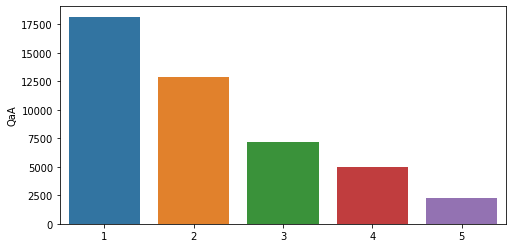

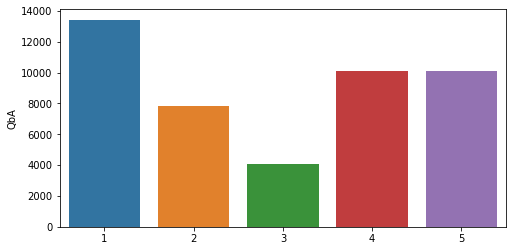

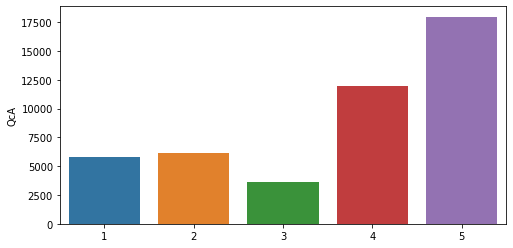

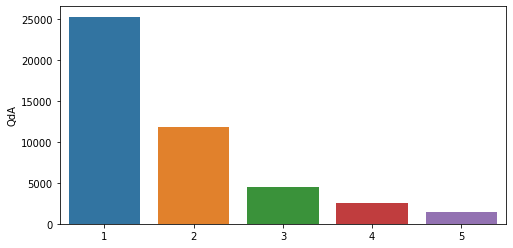

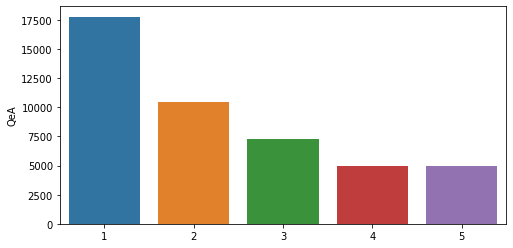

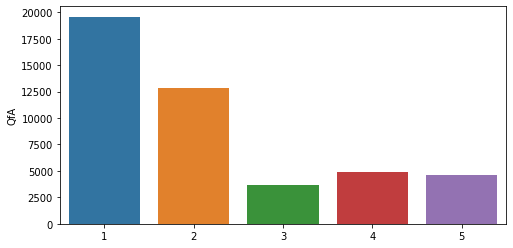

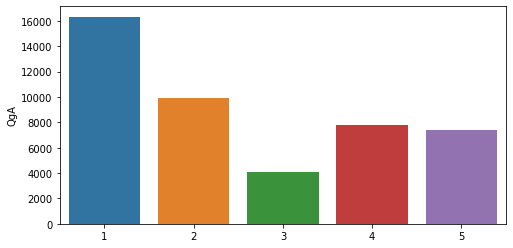

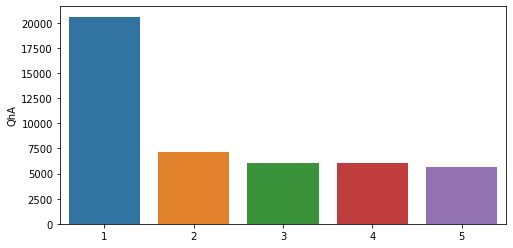

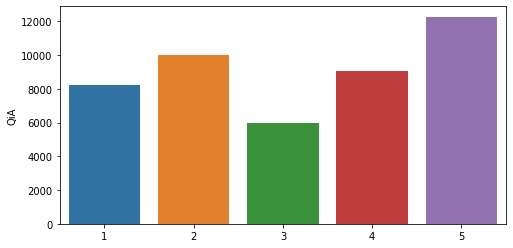

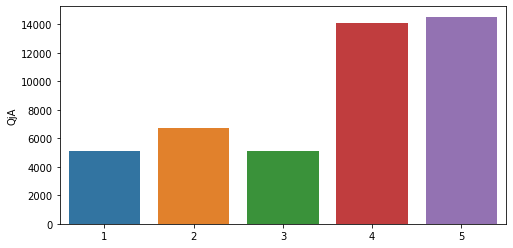

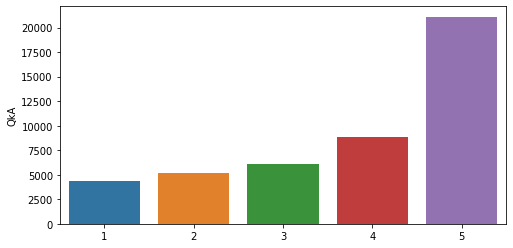

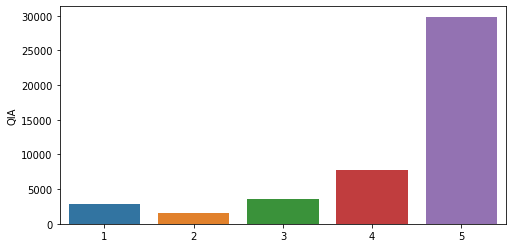

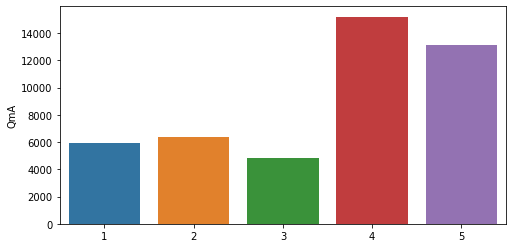

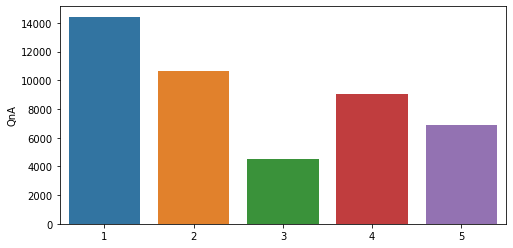

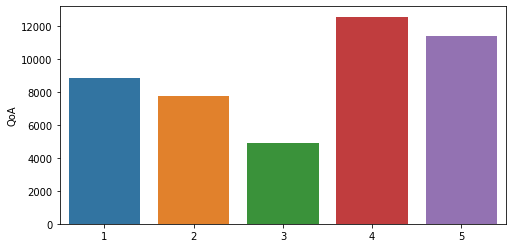

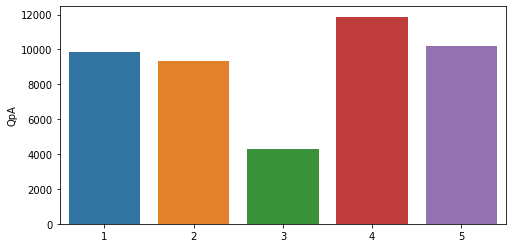

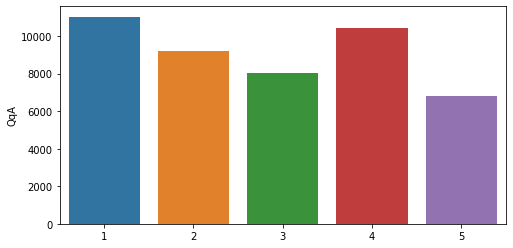

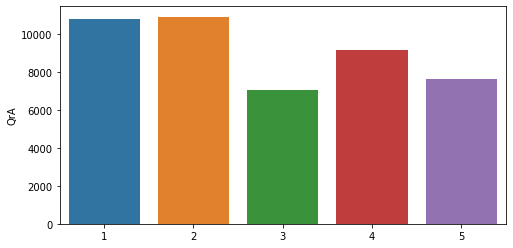

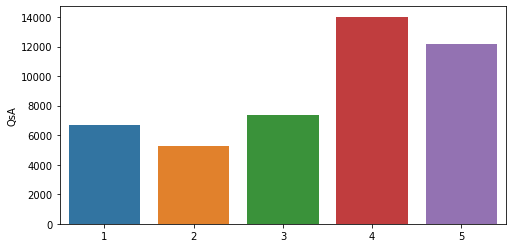

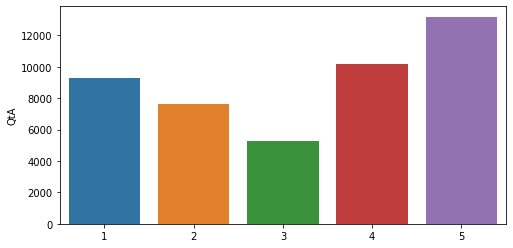

In [14]:
for que in Qli:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=df.index, y=df[que], data=df)